# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [4]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 282.29,
  'feels_like': 278.37,
  'temp_min': 281.48,
  'temp_max': 283.15,
  'pressure': 1008,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 200},
 'rain': {'1h': 1.47},
 'clouds': {'all': 20},
 'dt': 1613497552,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1613459549,
  'sunset': 1613495816},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Loop through the list of cities and perform a request for data on each
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind_speed = []
country = []
date = []
city_name = []
count = 1
sets = 1
print('Beginning Data Retrieval')    
print('-----------------------------')
for city in cities:
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Build query URL
    query_url = url + "units=imperial&appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    # Try to grab city and record #
    try:
        
        print(f'Processing Record {count} of Set {sets} | {city}')
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        
        
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print(f'City not found...skipping')
        pass
    
    #keep track of records and sets(max 50 per set)
    count = count +1
    if count == 50:
        count = 0
        sets = sets + 1

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tumannyy
City not found...skipping
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | banyo
Processing Record 10 of Set 1 | stantsiya gorchakovo
City not found...skipping
Processing Record 11 of Set 1 | mys shmidta
City not found...skipping
Processing Record 12 of Set 1 | hualmay
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | mayumba
Processing Record 21 of Set 1 | hermanus


Processing Record 37 of Set 4 | parambu
Processing Record 38 of Set 4 | donduseni
Processing Record 39 of Set 4 | sayyan
Processing Record 40 of Set 4 | bose
Processing Record 41 of Set 4 | umzimvubu
City not found...skipping
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | temaraia
City not found...skipping
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | muyezerskiy
Processing Record 46 of Set 4 | sosnovo-ozerskoye
Processing Record 47 of Set 4 | tibati
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | blagoyevo
Processing Record 0 of Set 5 | maketu
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | marystown
Processing Record 3 of Set 5 | rungata
City not found...skipping
Processing Record 4 of Set 5 | jinka
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | oum hadjer
Processing Record 8 of Set 5 | sinnamary
Processing Record 9 of Set 5 | b

Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | elko
Processing Record 32 of Set 8 | kota belud
Processing Record 33 of Set 8 | jodar
Processing Record 34 of Set 8 | erzurum
Processing Record 35 of Set 8 | north bend
Processing Record 36 of Set 8 | plettenberg bay
Processing Record 37 of Set 8 | gazanjyk
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | lake havasu city
Processing Record 40 of Set 8 | lae
Processing Record 41 of Set 8 | maldonado
Processing Record 42 of Set 8 | srikakulam
Processing Record 43 of Set 8 | mabaruma
Processing Record 44 of Set 8 | neiafu
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | mlonggo
Processing Record 47 of Set 8 | awbari
Processing Record 48 of Set 8 | san andres
Processing Record 49 of Set 8 | saldanha
Processing Record 0 of Set 9 | gizo
Processing Record 1 of Set 9 | kutum
Processing Record 2 of Set 9 | yingcheng
Processing Record 3 of Set 9 | gargzdai
Processing Record 

Processing Record 19 of Set 12 | mount gambier
Processing Record 20 of Set 12 | danilovka
Processing Record 21 of Set 12 | nargana
Processing Record 22 of Set 12 | ugoofaaru
Processing Record 23 of Set 12 | bur gabo
City not found...skipping
Processing Record 24 of Set 12 | kattivakkam
Processing Record 25 of Set 12 | godda
Processing Record 26 of Set 12 | saint-georges
Processing Record 27 of Set 12 | virginia beach
Processing Record 28 of Set 12 | glazov
Processing Record 29 of Set 12 | batsfjord
Processing Record 30 of Set 12 | puerto del rosario
Processing Record 31 of Set 12 | phnum penh
City not found...skipping
Processing Record 32 of Set 12 | atikokan
Processing Record 33 of Set 12 | kristiansund
Processing Record 34 of Set 12 | lilongwe
Processing Record 35 of Set 12 | harper
Processing Record 36 of Set 12 | portland
Processing Record 37 of Set 12 | xapuri
Processing Record 38 of Set 12 | haibowan
City not found...skipping
Processing Record 39 of Set 12 | mwanza
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
df = pd.DataFrame({'City': city_name, 'Lat': lat, 'Lon': lng, 'Max Temp (F)': max_temp, 'Humidity': humid, 'Cloudiness': cloud,'Wind Speed': wind_speed, 'Country': country, 'Date': date})
df.to_csv('../output_data/cities.csv', encoding='utf-8', index=False, date_format='%d/%m/%Y')
df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.98,74,2,15.59,PF,1613498067
1,Vaini,-21.2000,-175.2000,73.40,100,20,3.44,TO,1613498067
2,Mataura,-46.1927,168.8643,39.00,92,0,1.01,NZ,1613498067
3,Hobart,-42.8794,147.3294,55.99,88,1,8.05,AU,1613498067
4,Busselton,-33.6500,115.3333,59.00,95,0,9.42,AU,1613498068


In [26]:
df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,18.879360,19.620374,50.662105,71.780702,53.631579,8.519175,1.613498e+09
std,33.288185,90.998689,32.974090,20.104454,38.392859,6.292829,6.394788e+01
min,-54.800000,-179.166700,-38.200000,5.000000,0.000000,0.180000,1.613498e+09
25%,-7.997450,-60.923925,29.562500,62.000000,13.250000,3.660000,1.613498e+09
50%,21.638350,21.908450,62.915000,77.000000,62.000000,6.910000,1.613498e+09
75%,46.597175,105.047100,77.000000,87.000000,90.000000,11.500000,1.613498e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,47.310000,1.613498e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
len(df)

570

In [19]:
quartiles = df['Humidity'].sort_values().quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 62.0
The upper quartile of humidity is: 87.0
The interquartile range of humidity is: 25.0
The the median of humidity is: 77.0 
Values below 24.5 could be outliers.
Values above 124.5 could be outliers.


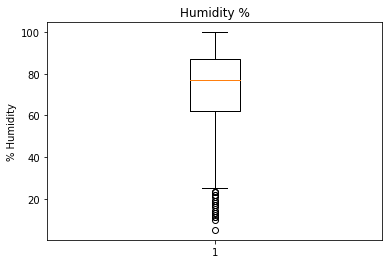

In [27]:
# Example outlier plot of humidity

fig1, ax1 = plt.subplots()
ax1.set_title('Humidity %')
ax1.set_ylabel('% Humidity')
ax1.boxplot(df['Humidity'])
plt.show()

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [29]:
clean_city_data = df.drop(df.query('Humidity < 24.5 | Humidity > 124.5').index, inplace=False)
# print(len(clean_city_data) - len(df))
clean_city_data.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.98,74,2,15.59,PF,1613498067
1,Vaini,-21.2000,-175.2000,73.40,100,20,3.44,TO,1613498067
2,Mataura,-46.1927,168.8643,39.00,92,0,1.01,NZ,1613498067
3,Hobart,-42.8794,147.3294,55.99,88,1,8.05,AU,1613498067
4,Busselton,-33.6500,115.3333,59.00,95,0,9.42,AU,1613498068


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


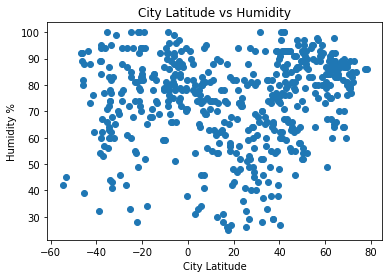

In [31]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

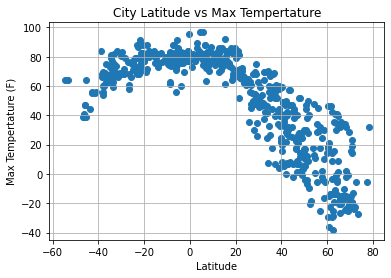

In [32]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp (F)']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Tempertature')
plt.xlabel('Latitude')
plt.ylabel('Max Tempertature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

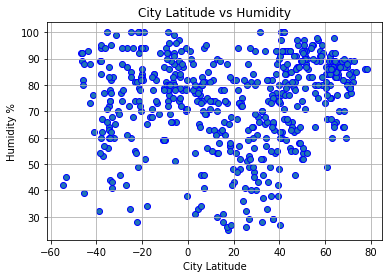

In [34]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, edgecolors='b')
plt.title('City Latitude vs Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig('../output_data/lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig('../output_data/lat_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../output_data/lat_wind.png')
plt.show()

## Linear Regression

In [ ]:
# create df's separating northern and southern hemisphere
north_data = clean_city_data.drop(clean_city_data.query('Lat < 0').index, inplace=False)
south_data = clean_city_data.drop(clean_city_data.query('Lat > 0').index, inplace=False)
south_data.head()
dir(south_data)

In [ ]:
# Add the linear regression equation and line to plot

x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-3,30),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:

x_values = north_data['Lat']
y_values = north_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-3,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.savefig('../output_data/north_lat_temp_lr.png')
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south_data['Lat']
y_values = south_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.savefig('../output_data/south_lat_temp_lr.png')
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_data['Lat']
y_values = north_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/north_lat_humidity_lr.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_data['Lat']
y_values = south_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/south_lat_humidity_lr.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/south_lat_cloud_lr.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/south_lat_cloud_lr.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/south_lat_wind_lr.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('../output_data/south_lat_wind_lr.png')
plt.show()